<cite>Darryl Oatridge, August 2022<cite>

## Visualisation

In [35]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [36]:
from ds_discovery import Transition, Commons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,6

In [38]:
tr = Transition.from_memory()

In [39]:
tr.set_persist()

### Visual Stats

In [40]:
dataset = 'titanic'
tr.add_connector_uri(connector_name=dataset, uri=f'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/{dataset}.csv')
titanic = tr.load_canonical(dataset)
tr.canonical_report(titanic, stylise=False)

,Attributes (15),dType,%_Null,%_Dom,Count,Unique,Observations
0,adult_male,bool,0.000,0.603,891,2,True | False
1,age,float64,0.199,0.199,891,89,max=80.0 | min=0.42 | mean=29.7 | dominant=24.0
2,alive,object,0.000,0.616,891,2,Sample: no | yes
3,alone,bool,0.000,0.603,891,2,False | True
4,class,object,0.000,0.551,891,3,Sample: Third | First | Second
5,deck,object,0.772,0.772,891,8,Sample: C | B | D | E | A
6,embark_town,object,0.002,0.723,891,4,Sample: Southampton | Cherbourg | Queenstown
7,embarked,object,0.002,0.723,891,4,Sample: S | C | Q
8,fare,float64,0.000,0.048,891,248,max=512.3292 | min=0.0 | mean=32.2 | dominant=8.05
9,parch,int64,0.000,0.761,891,7,max=6 | min=0 | mean=0.38 | dominant=0


In [41]:
# titanic = tr.tools.model_to_category(titanic, headers=['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked'])
titanic = Commons.filter_columns(titanic, headers=['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked'])

In [42]:
tr.canonical_report(titanic, stylise=False)

,Attributes (6),dType,%_Null,%_Dom,Count,Unique,Observations
0,embarked,object,0.002,0.723,891,4,Sample: S | C | Q
1,parch,int64,0.000,0.761,891,7,max=6 | min=0 | mean=0.38 | dominant=0
2,pclass,int64,0.000,0.551,891,3,max=3 | min=1 | mean=2.31 | dominant=3
3,sex,object,0.000,0.648,891,2,Sample: male | female
4,sibsp,int64,0.000,0.682,891,7,max=8 | min=0 | mean=0.52 | dominant=0
5,survived,int64,0.000,0.616,891,2,max=1 | min=0 | mean=0.38 | dominant=0


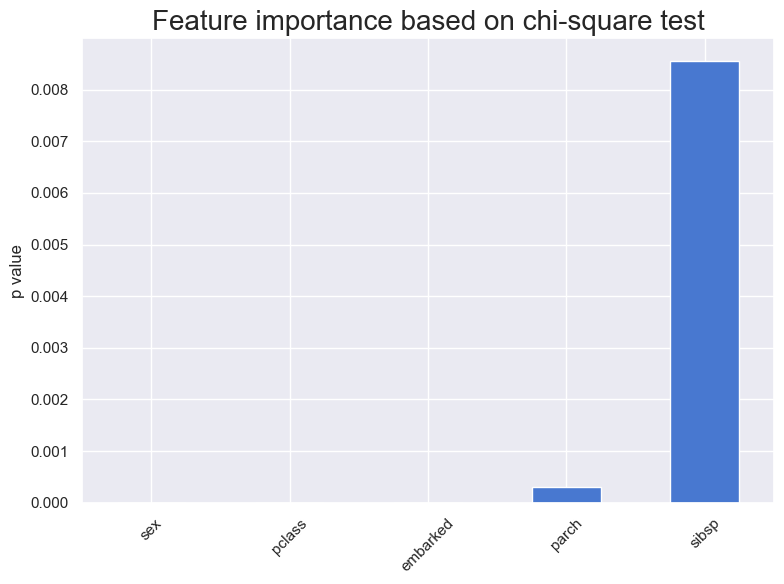

<Figure size 800x600 with 0 Axes>

In [43]:
tr.visual.show_chi_square(titanic, target='survived')

In [44]:
dataset = 'tips'
tr.add_connector_uri(connector_name=dataset, uri=f'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/{dataset}.csv')
tips = tr.load_canonical(dataset)
tr.canonical_report(tips, stylise=False)

,Attributes (7),dType,%_Null,%_Dom,Count,Unique,Observations
0,day,object,0.0,0.357,244,4,Sample: Sat | Sun | Thur | Fri
1,sex,object,0.0,0.643,244,2,Sample: Male | Female
2,size,int64,0.0,0.639,244,6,max=6 | min=1 | mean=2.57 | dominant=2
3,smoker,object,0.0,0.619,244,2,Sample: No | Yes
4,time,object,0.0,0.721,244,2,Sample: Dinner | Lunch
5,tip,float64,0.0,0.135,244,123,max=10.0 | min=1.0 | mean=3.0 | dominant=2.0
6,total_bill,float64,0.0,0.012,244,229,max=50.81 | min=3.07 | mean=19.79 | dominant=13.42


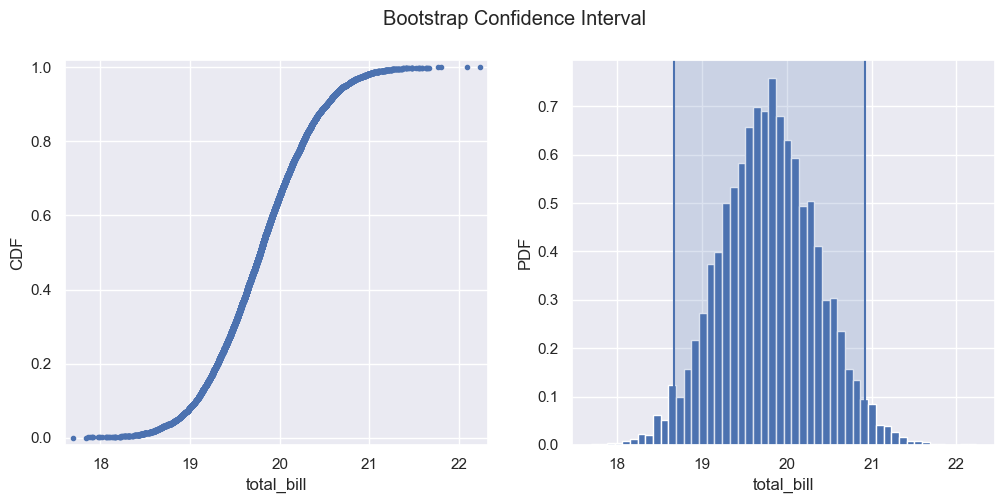

<Figure size 800x600 with 0 Axes>

In [45]:
tr.visual.show_bootstrap_confidence_interval(tips, header='total_bill')

In [46]:
tr.add_connector_uri(connector_name='penguins', uri=f'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
penguins = tr.load_canonical('penguins')
tr.canonical_report(penguins, stylise=False)

,Attributes (7),dType,%_Null,%_Dom,Count,Unique,Observations
0,bill_depth_mm,float64,0.006,0.035,344,81,max=21.5 | min=13.1 | mean=17.15 | dominant=17.0
1,bill_length_mm,float64,0.006,0.020,344,165,max=59.6 | min=32.1 | mean=43.92 | dominant=41.1
2,body_mass_g,float64,0.006,0.035,344,95,max=6300.0 | min=2700.0 | mean=4201.75 | dominant=3800.0
3,flipper_length_mm,float64,0.006,0.064,344,56,max=231.0 | min=172.0 | mean=200.92 | dominant=190.0
4,island,object,0.000,0.488,344,3,Sample: Biscoe | Dream | Torgersen
5,sex,object,0.032,0.488,344,3,Sample: MALE | FEMALE
6,species,object,0.000,0.442,344,3,Sample: Adelie | Gentoo | Chinstrap


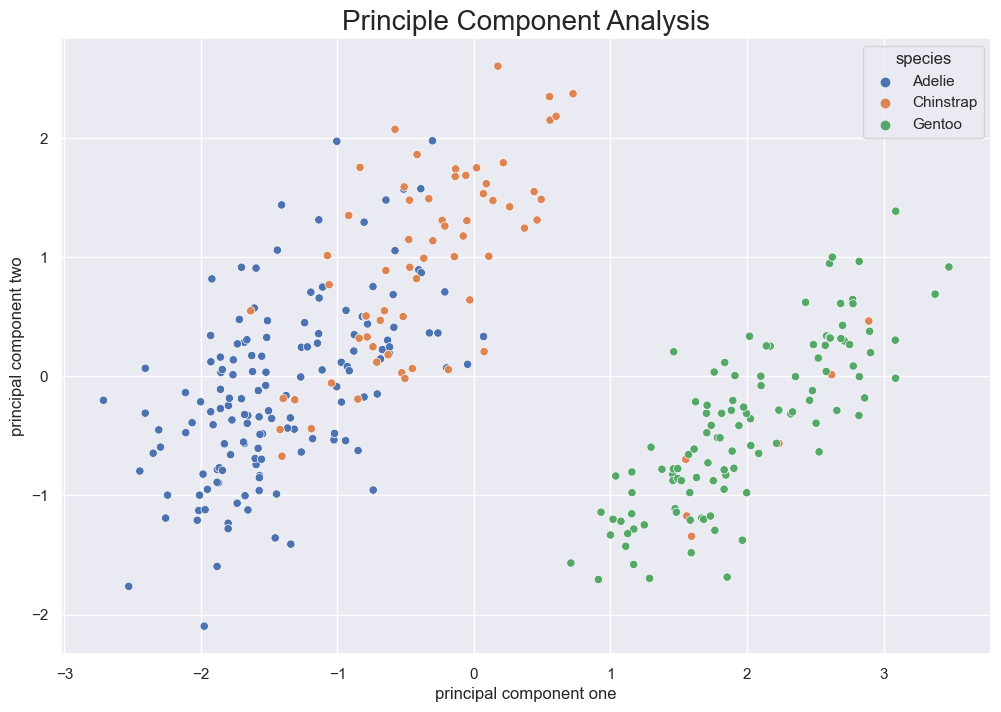

<Figure size 800x600 with 0 Axes>

In [47]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g',]
tr.visual.show_pca(penguins.dropna(), headers=features, hue='species')

<Figure size 1200x1200 with 0 Axes>

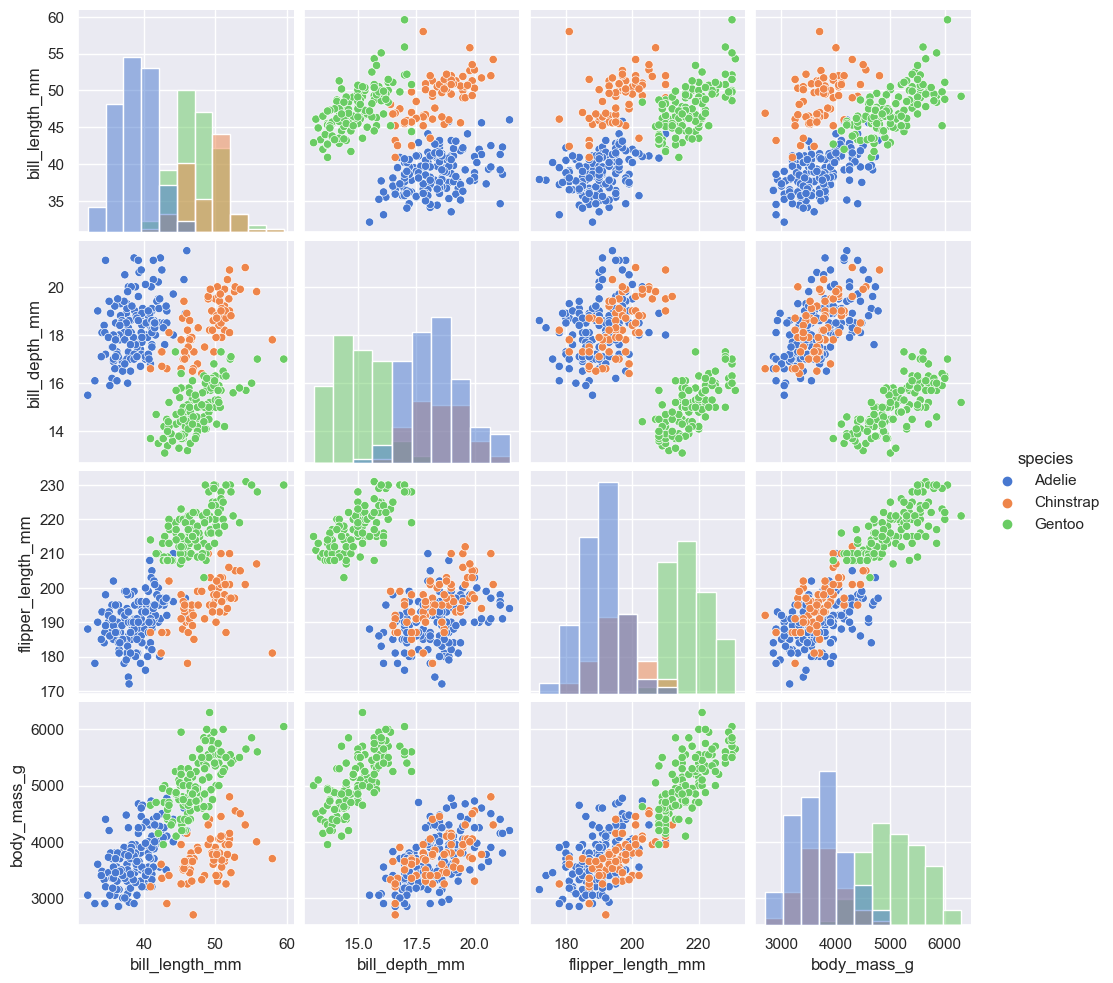

<Figure size 800x600 with 0 Axes>

In [48]:
tr.visual.show_corr_pairplot(penguins, hue='species')

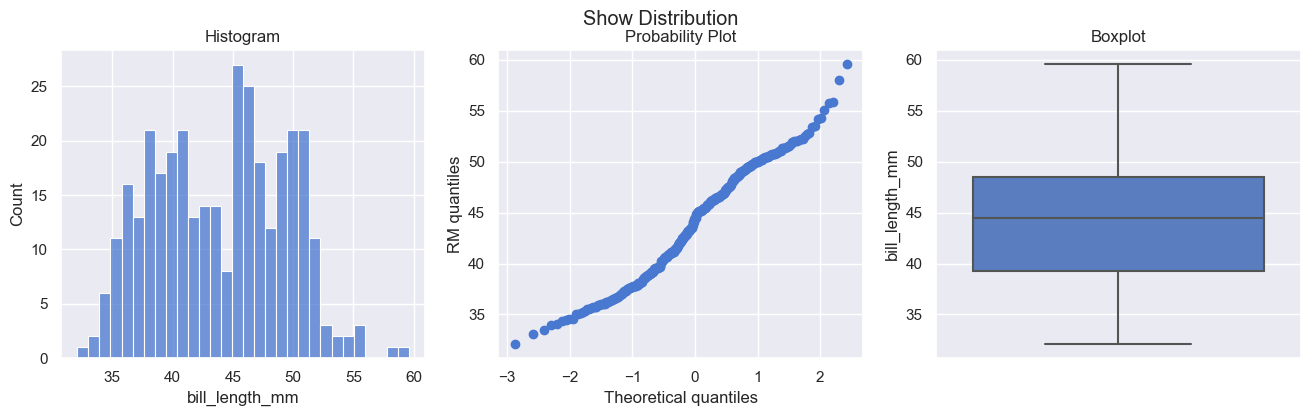

<Figure size 800x600 with 0 Axes>

In [49]:
tr.visual.show_distribution(penguins, header='bill_length_mm')

In [51]:
tr.tools.__dir__()

['auto_clean_header',
 'auto_drop_columns',
 'auto_drop_correlated',
 'auto_drop_duplicates',
 'auto_projection',
 'auto_reinstate_nulls',
 'auto_remove_null_rows',
 'auto_to_category',
 'auto_transition',
 'run_intent_pipeline',
 'to_bool_type',
 'to_category_type',
 'to_date_element',
 'to_date_from_excel_type',
 'to_date_from_mpldates',
 'to_date_type',
 'to_float_type',
 'to_int_type',
 'to_list_type',
 'to_numeric_type',
 'to_remove',
 'to_sample',
 'to_select',
 'to_str_type']